In [1]:
import cv2
import numpy as np
import mediapipe as mp
from matplotlib import pyplot as plt 
import os
import pandas as pd
import time

In [1]:
# importing the tensorflow package
import tensorflow as tf
tf.test.is_built_with_cuda()
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [3]:
import sys

import keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.13.1
Keras Version: 2.13.1

Python 3.11.0 | packaged by conda-forge | (main, Oct 25 2022, 06:12:32) [MSC v.1929 64 bit (AMD64)]
Pandas 2.2.1
Scikit-Learn 1.5.0
GPU is NOT AVAILABLE


In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [2]:
mp_holistic = mp.solutions.holistic # Hàm trả về vị trí các điểm pose trên cơ thể
mp_drawing = mp.solutions.drawing_utils # Hàm vẽ các điểm pose đó ra

In [3]:
# Phát hiện ra các điểm pose trên cơ thể
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False   #  Xử lý nhanh hơn              
    results = model.process(image)                 
    image.flags.writeable = True                    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [ ]:
# Vẽ các điểm pose đó ra 
def draw_landmarks(image, results):
    if results.pose_landmarks:
        for idx, landmark in enumerate(results.pose_landmarks.landmark[30:]):
            h, w, _ = image.shape
            cx, cy = int(landmark.x * w), int(landmark.y * h)
            cv2.circle(image, (cx, cy), 5, (0, 255, 0), -1)

In [12]:
def show_image(video_path):
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        video_reader = cv2.VideoCapture(video_path) # Đọc video từ đường dẫn cho trước
        ret, frame = video_reader.read() # Lấy frame từ video trên
            
        # Vẽ các điểm pose 
        image, results = mediapipe_detection(frame, holistic)
        draw_landmarks(image, results)
        
        plt.figure(figsize=(20, 15))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        # Nếu frame không tồn hay nói cách khác là đã xử lý xong frame cuối cùng
        # ret = None và frame = False --> thoát khỏi vòng lặp 

        video_reader.release() # Giải phóng các biến đã lưu cũng như dung lượng để máy đỡ lag

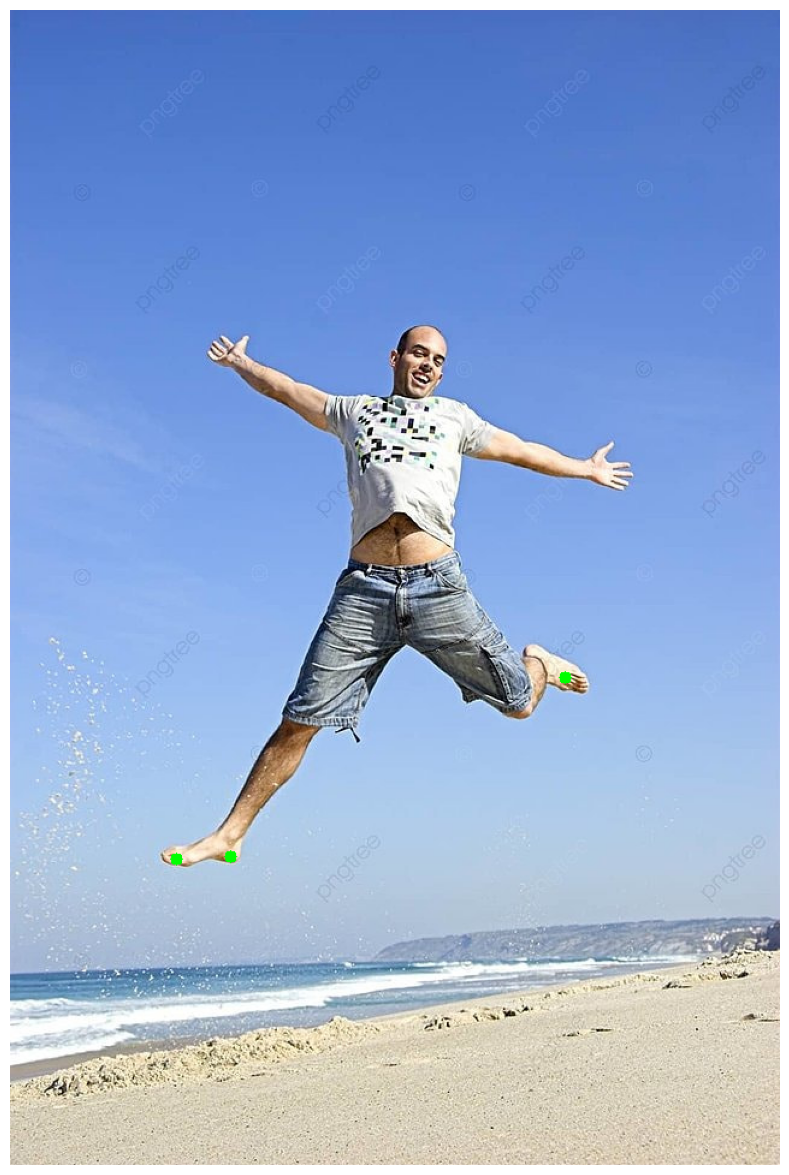

In [21]:
show_image(r'F:\Dataset\Hình người.jpg')